In [1]:
import pandas_datareader as pdr

In [2]:
df = pdr.get_data_tiingo('TSLA',api_key = "b6cae8248900c9896eeecab0aeab4bed839cb1f5")

C:\ProgramData\Anaconda3\lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  return pd.concat(dfs, self._concat_axis)


In [3]:
df.to_csv('TSLA.csv')

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('TSLA.csv')

In [6]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,TSLA,2017-06-07 00:00:00+00:00,359.65,360.50,355.14,356.34,9287888,71.930,72.100,71.028,71.268,46439440,0.0,1.0
1,TSLA,2017-06-08 00:00:00+00:00,370.00,371.90,360.22,363.75,8975028,74.000,74.380,72.044,72.750,44875140,0.0,1.0
2,TSLA,2017-06-09 00:00:00+00:00,357.32,376.87,354.80,374.42,17160231,71.464,75.374,70.960,74.884,85801155,0.0,1.0
3,TSLA,2017-06-12 00:00:00+00:00,359.01,364.50,350.62,357.99,10476833,71.802,72.900,70.124,71.598,52384165,0.0,1.0
4,TSLA,2017-06-13 00:00:00+00:00,375.95,376.00,366.61,367.62,11693404,75.190,75.200,73.322,73.524,58467020,0.0,1.0


In [7]:
df1 = df.reset_index()['close']

In [8]:
df1.shape

(1258,)

In [10]:
df1

0       359.65
1       370.00
2       357.32
3       359.01
4       375.95
         ...  
1253    759.63
1254    758.26
1255    740.37
1256    775.00
1257    703.55
Name: close, Length: 1258, dtype: float64

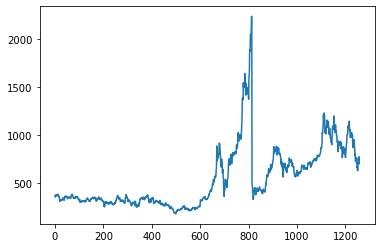

In [12]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [13]:
import numpy as np

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [15]:
df1.shape

(1258, 1)

In [18]:
training_size = int(len(df1)*0.65)
test_size = len(df1) - training_size
train_data,test_data = df1[0:training_size,:],df1[training_size:len(df1),:]

In [19]:
training_size,test_size

(817, 441)

In [20]:
len(train_data),len(test_data)

(817, 441)

In [21]:
import numpy

def create_dataset(dataset,time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i + time_step,0])
    return numpy.array(dataX), numpy.array(dataY)

In [22]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [25]:
print(X_train.shape),print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [24]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [26]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [30]:
model = Sequential()
model.add(LSTM(50,return_sequences = True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [31]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 7s 247ms/step - loss: 0.0135 - val_loss: 0.0031
Epoch 2/100
12/12 [==============================] - 2s 149ms/step - loss: 0.0036 - val_loss: 0.0069
Epoch 3/100
12/12 [==============================] - 2s 148ms/step - loss: 0.0031 - val_loss: 0.0019
Epoch 4/100
12/12 [==============================] - 2s 145ms/step - loss: 0.0030 - val_loss: 0.0036
Epoch 5/100
12/12 [==============================] - 2s 143ms/step - loss: 0.0030 - val_loss: 0.0021
Epoch 6/100
12/12 [==============================] - 2s 155ms/step - loss: 0.0031 - val_loss: 0.0018
Epoch 7/100
12/12 [==============================] - 3s 273ms/step - loss: 0.0034 - val_loss: 0.0062
Epoch 8/100
12/12 [==============================] - 3s 212ms/step - loss: 0.0029 - val_loss: 0.0036
Epoch 9/100
12/12 [==============================] - 2s 207ms/step - loss: 0.0029 - val_loss: 0.0048
Epoch 10/100
12/12 [==============================] - 2s 208ms/step - loss: 0.0028 - val_lo

Epoch 81/100
12/12 [==============================] - 2s 167ms/step - loss: 0.0014 - val_loss: 9.6235e-04
Epoch 82/100
12/12 [==============================] - 2s 130ms/step - loss: 0.0013 - val_loss: 0.0010
Epoch 83/100
12/12 [==============================] - 2s 129ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 84/100
12/12 [==============================] - 2s 131ms/step - loss: 0.0012 - val_loss: 0.0024
Epoch 85/100
12/12 [==============================] - 2s 129ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 86/100
12/12 [==============================] - 2s 128ms/step - loss: 0.0011 - val_loss: 9.5141e-04
Epoch 87/100
12/12 [==============================] - 2s 130ms/step - loss: 0.0011 - val_loss: 9.7507e-04
Epoch 88/100
12/12 [==============================] - 2s 131ms/step - loss: 0.0011 - val_loss: 0.0013
Epoch 89/100
12/12 [==============================] - 2s 130ms/step - loss: 0.0011 - val_loss: 8.0470e-04
Epoch 90/100
12/12 [==============================] - 2s 130ms/ste

In [34]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
11/11 [==============================] - 0s 34ms/step


In [35]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [36]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

573.7084230534251

In [38]:
math.sqrt(mean_squared_error(ytest,test_predict))

881.7952688497378

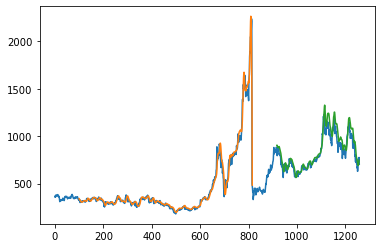

In [39]:
look_back = 100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:]=train_predict
testPredictPlot=numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1,:] = test_predict
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()